[[29926     0     0    12     0     0     0     0     0     0     0     0
      0]
 [ 1562     0     0     0     0     0     0     0     0     0     0     0
      0]
 [ 3556     0     0     1     0     0     0     0     0     0     0     0
      0]
 [ 1291     0     0     0     0     0     0     0     0     0     0     0
      0]
 [   75     0     0     0     0     0     0     0     0     0     0     0
      0]
 [   59     0     0     0     0     0     0     0     0     0     0     0
      0]
 [   13     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    4     0     0     0     0     0     0     0     0     0     0     0
      0]
 [   45     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    1     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  138     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    9     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  

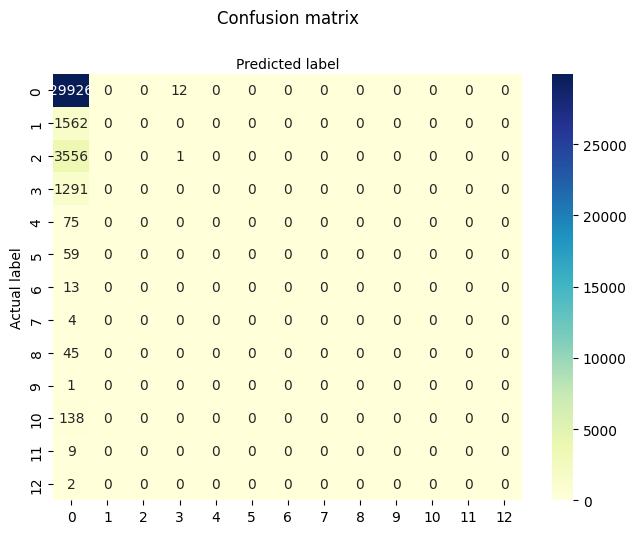

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import torch
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.naive_bayes import GaussianNB

dataset_path = 'df6.csv'
df = pd.read_csv(dataset_path)

mapping = {
    7 : 1,
    8 : 2,
    9 : 3,
    19 : 4,
    39 : 5,
    46 : 6,
    28 : 7,
    29 : 8,
    52 : 9,
    43 : 10,
    53 : 11,
    63 : 12
}

df['Violent-Crime'] = df['HIGHEST_NIBRS_DESCRIPTION'].map(mapping).fillna(0)

shuffled = shuffle(df, random_state=42)

training_data = shuffled[shuffled['Year'] != 2023]
validation_data = shuffled[shuffled['Year'] == 2023]

y_train = training_data.pop('Violent-Crime').values
y_test = validation_data.pop('Violent-Crime').values

X_train = StandardScaler().fit_transform(training_data)
X_test = StandardScaler().fit_transform(validation_data)

classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
report = classification_report(y_test, y_pred, zero_division=1)
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

class_names = [0,1,2,3,4,5,6,7,8,9,10,11,12]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix' , y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print(report)